# Data sampling

Samples the dataset based on project prominence.

## Dataset loading

In [1]:
import pandas as pd
import python_proj.utils.exp_utils as exp_utils

data_file_name = "dataset_with_constructed"

data_path_format = exp_utils.BASE_PATH + "/final_data/{data_file_name}.csv"
data_path = data_path_format.format(data_file_name=data_file_name)
print(f"{data_path=}")

df: pd.DataFrame = pd.read_csv(filepath_or_buffer=data_path, header=0)

figure_base_path = f"{exp_utils.BASE_PATH}/figures/modelling/{data_file_name}/"
print(f"{figure_base_path=}")

print(f"{len(df)=}.")
print(f"{len(df.columns)=}\n")

df.describe()

data_path='./data//final_data/dataset_with_constructed.csv'


figure_base_path='./data//figures/modelling/dataset_with_constructed/'
len(df)=1815972.
len(df.columns)=43



,ID,Project Name,Submitter ID,PR Number,Closed At,ControlPullRequestLifeTimeInMinutes,ControlNumberOfCommitsInPullRequest,ControlIntraProjectPullRequestExperienceOfIntegrator,IntraProjectSubmitterPullRequestSubmissionCount,IntraProjectSubmitterPullRequestSuccessRate,...,DependencyEcosystemExperienceSubmitterIssueSubmissionCount,DependencyEcosystemExperienceSubmitterIssueCommentCount,NonDependencyEcosystemExperienceSubmitterIssueSubmissionCount,NonDependencyEcosystemExperienceSubmitterIssueCommentCount,InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount,InversedDependencyEcosystemExperienceSubmitterIssueCommentCount,WeightedEcosystemSecondOrderDegreeCentrality,WeightedIntraProjectSecondOrderDegreeCentrality,EcosystemLinkIntensity,IntraProjectLinkIntensity
count,1.815972e+06,1.815972e+06,1815972.0,1815972.0,1815972.0,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,...,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06
mean,9.079855e+05,7.685628e+03,0.0,0.0,0.0,3.190111e+04,4.947501e+00,1.932087e+02,1.679350e+01,5.352468e-01,...,1.743463e-01,8.645552e-01,2.274088e+00,1.570265e+01,1.854588e-01,1.355166e+00,2.296422e+01,7.815218e+01,8.608194e-01,4.332911e+00
std,5.242261e+05,5.771199e+03,0.0,0.0,0.0,1.399335e+05,7.283362e+01,4.827151e+02,5.548605e+01,4.623260e-01,...,1.580686e+00,1.186131e+01,7.064174e+00,6.131080e+01,2.446396e+00,1.667164e+01,1.037335e+03,3.696540e+03,8.019720e+00,3.575078e+01
min,0.000000e+00,4.300000e+01,0.0,0.0,0.0,1.666667e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.539928e+05,2.136000e+03,0.0,0.0,0.0,5.290000e+01,1.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.079855e+05,7.435000e+03,0.0,0.0,0.0,9.799167e+02,1.000000e+00,3.000000e+01,2.000000e+00,8.000000e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.503077e-01,0.000000e+00,0.000000e+00
75%,1.361978e+06,1.243800e+04,0.0,0.0,0.0,7.328350e+03,3.000000e+00,1.410000e+02,1.700000e+01,1.000000e+00,...,0.000000e+00,0.000000e+00,2.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,1.870552e+00,4.883533e+00,0.000000e+00,4.910620e-01
max,1.815971e+06,2.009400e+04,0.0,0.0,0.0,4.489490e+06,1.000000e+04,4.281000e+03,1.703000e+03,1.000000e+00,...,3.730000e+02,9.270000e+02,2.332000e+03,7.630000e+03,7.410000e+02,2.764000e+03,5.534965e+05,2.524147e+06,9.048289e+02,5.249874e+03


## Visualization PRs over time

In [2]:
from python_proj.utils.util import safe_save_fig
import pandas as pd
import matplotlib.pyplot as plt

is_obfuscated_data = (df["Closed At"] == 0).all()

# This step can only be performed with non-obfuscated data.
if not is_obfuscated_data:
    dates = pd.to_datetime(df["Closed At"], format="%Y-%m-%dT%H:%M:%SZ")

    pr_count_per_year_month = dates.groupby([dates.dt.year, dates.dt.month]).count()
    axs = pr_count_per_year_month.plot(kind="line")

    # Fixes x-ticks to be less cluttered.
    xticks_years = []
    last_year = -1
    for year, _ in pr_count_per_year_month.keys():
        if last_year != year:
            last_year = year
            xticks_years.append(year)
        else:
            xticks_years.append("")
    axs.set_xticks(range(len(xticks_years)))
    axs.set_xticklabels(xticks_years)

    axs.set_xlabel("Time")
    axs.set_ylabel("Pull Requests")
    axs.set_title("Number of pull requests over time")

    output_path = f"{figure_base_path}/demographics/pr_count_per_year_month.png"
    safe_save_fig(output_path)

    plt.show()

## PRs per project

percentile=98
percentile_index=19650
Top project count: 402


Pull Requests below 98th percentile: 939645/1815972 (51.743%)



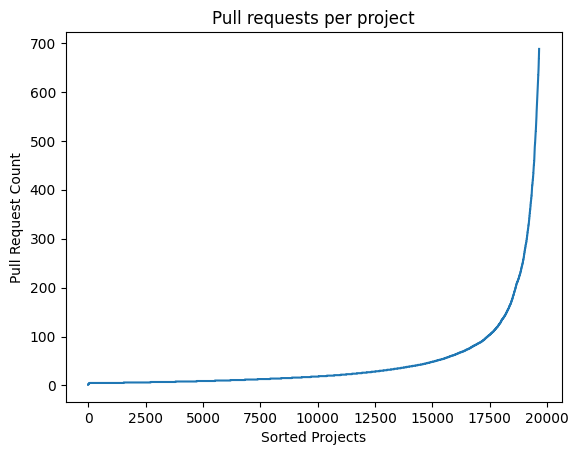

In [3]:
import math


def __plot(__df, figure_name: str):
    plt.clf()
    axs = __df.plot(kind="line", use_index=False)
    axs.set_xlabel("Sorted Projects")
    axs.set_ylabel("Pull Request Count")
    axs.set_title("Pull requests per project")
    output_path = f"{figure_base_path}/demographics/{figure_name}.png"
    safe_save_fig(output_path)


# all data plot
pr_count_per_project = df['Project Name'].groupby(df["Project Name"]).count()
pr_count_per_project = pr_count_per_project.sort_values()
__plot(pr_count_per_project, "prs_per_project_all")

# up to 97th Percentile plot
project_count = len(pr_count_per_project)
# NOTE: with the 74th percentile the PR counts of the capped
# elite and the rest are approximately equal. The total number
# of entries is then 479.801.
percentile = 98
print(f"{percentile=}")
percentile_index = math.floor(project_count * percentile / 100)
print(f"{percentile_index=}")
print(f"Top project count: {project_count - percentile_index}")
perc_data = pr_count_per_project.iloc[:percentile_index]
__plot(perc_data, f"prs_per_project_up_to_{percentile}th_percentile")

# Printing some stats.
total_pull_count = sum(pr_count_per_project.values)
bottom_pull_count = sum(perc_data.values)
ratio = 100 * bottom_pull_count / total_pull_count
print(
    f"Pull Requests below {percentile}th percentile: {bottom_pull_count}/{total_pull_count} ({ratio:.03f}%)\n"
)

In [4]:
# Calculates cap

maximum_pulls = max(perc_data.values)
capped_top_pulls_count = maximum_pulls * (project_count - percentile_index)

print(f"{maximum_pulls=}")
print(f"{capped_top_pulls_count=}")
print(f"{bottom_pull_count + capped_top_pulls_count=}")

maximum_pulls=688
capped_top_pulls_count=276576
bottom_pull_count + capped_top_pulls_count=1216221


## PRs per project subsampling

Samples projects based on the calculated PR cap.

In [5]:
from wmutils.general import Counter

sampling_seed_counter = Counter()


def sample_with_maximum(project_subset: pd.DataFrame, max_sample_size: int):
    """Randomly samples the group if its number of elements exceed the provided cap."""
    if len(project_subset) > max_sample_size:
        seed = sampling_seed_counter.get_next()
        return project_subset.sample(max_sample_size, random_state=seed)
    return project_subset


# Samples top projects with the PR cap.
df = df.groupby("Project Name").apply(
    sample_with_maximum, max_sample_size=maximum_pulls
)

print(f"Sub-sampled df length: {len(df)}")

Sub-sampled df length: 1216221


## Dataset save to file

In [6]:
output_data_file_name = "dataset_subsampled"
output_path = data_path_format.format(data_file_name=output_data_file_name)
print(f"Outputting to '{output_path}'")

df.to_csv(output_path, index=False)

df.describe()

Outputting to './data//final_data/dataset_subsampled.csv'


,ID,Project Name,Submitter ID,PR Number,Closed At,ControlPullRequestLifeTimeInMinutes,ControlNumberOfCommitsInPullRequest,ControlIntraProjectPullRequestExperienceOfIntegrator,IntraProjectSubmitterPullRequestSubmissionCount,IntraProjectSubmitterPullRequestSuccessRate,...,DependencyEcosystemExperienceSubmitterIssueSubmissionCount,DependencyEcosystemExperienceSubmitterIssueCommentCount,NonDependencyEcosystemExperienceSubmitterIssueSubmissionCount,NonDependencyEcosystemExperienceSubmitterIssueCommentCount,InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount,InversedDependencyEcosystemExperienceSubmitterIssueCommentCount,WeightedEcosystemSecondOrderDegreeCentrality,WeightedIntraProjectSecondOrderDegreeCentrality,EcosystemLinkIntensity,IntraProjectLinkIntensity
count,1.216221e+06,1.216221e+06,1216221.0,1216221.0,1216221.0,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,...,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06
mean,9.081164e+05,8.677039e+03,0.0,0.0,0.0,3.685069e+04,4.210476e+00,4.014674e+01,9.869163e+00,5.027905e-01,...,2.019806e-01,8.583325e-01,2.498338e+00,1.757198e+01,2.573036e-01,1.798150e+00,2.918379e+01,6.403151e+01,1.098749e+00,2.662755e+00
std,5.243531e+05,5.806587e+03,0.0,0.0,0.0,1.537950e+05,5.512267e+01,1.160820e+02,3.458581e+01,4.710578e-01,...,1.710005e+00,9.254259e+00,7.565769e+00,6.527831e+01,2.921277e+00,1.891477e+01,1.216683e+03,3.492823e+03,9.274709e+00,2.778900e+01
min,0.000000e+00,4.300000e+01,0.0,0.0,0.0,1.666667e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.542500e+05,3.224000e+03,0.0,0.0,0.0,3.708333e+01,1.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.078700e+05,8.413000e+03,0.0,0.0,0.0,8.987833e+02,1.000000e+00,1.100000e+01,1.000000e+00,6.666667e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.180555e-01,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.362318e+06,1.357000e+04,0.0,0.0,0.0,7.997850e+03,3.000000e+00,3.800000e+01,9.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,2.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,2.698931e+00,2.684865e+00,0.000000e+00,2.475789e-01
max,1.815970e+06,2.009400e+04,0.0,0.0,0.0,4.489490e+06,1.000000e+04,4.271000e+03,1.699000e+03,1.000000e+00,...,3.730000e+02,9.270000e+02,2.332000e+03,7.630000e+03,7.410000e+02,2.764000e+03,5.534965e+05,2.524147e+06,9.048289e+02,5.249874e+03


In [7]:
import datetime

print(datetime.datetime.now())

2024-02-21 16:43:37.750734
